<a href="https://colab.research.google.com/github/jlifferth/UQ-BIO-2021/blob/main/ChemicalMasterEquation_WorkBook_JTL_copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


---
# **Solving the Chemical Master Equation using the Finite State Projection Approach**


---

In [2]:
!wget -q --recursive -np bitbio.org/cme/ -P /content/ --accept py, JPG, jpg --reject index*
!mv bitbio.org/cme/* .
!rm -r bitbio.org/
from utility.Model import *
from utility.Solvers import *
from utility.preallocate import preallocate
from utility.ModelBuilder import *
import matplotlib.pyplot as plt
import numpy as np
import scipy
from IPython.display import Image
import matplotlib.animation as animation
from matplotlib import rc
rc('animation', html='jshtml')
figSize=800

---

**Background**

---

The SSA simulation is very useful for quickly simulating the stochastic behavior of systems, but the SSA only *samples* from a *true distribution*. The finitie state projection (FSP) instead solves how probability flows over the set of possible chemical states and can be used to solve for this distribution.

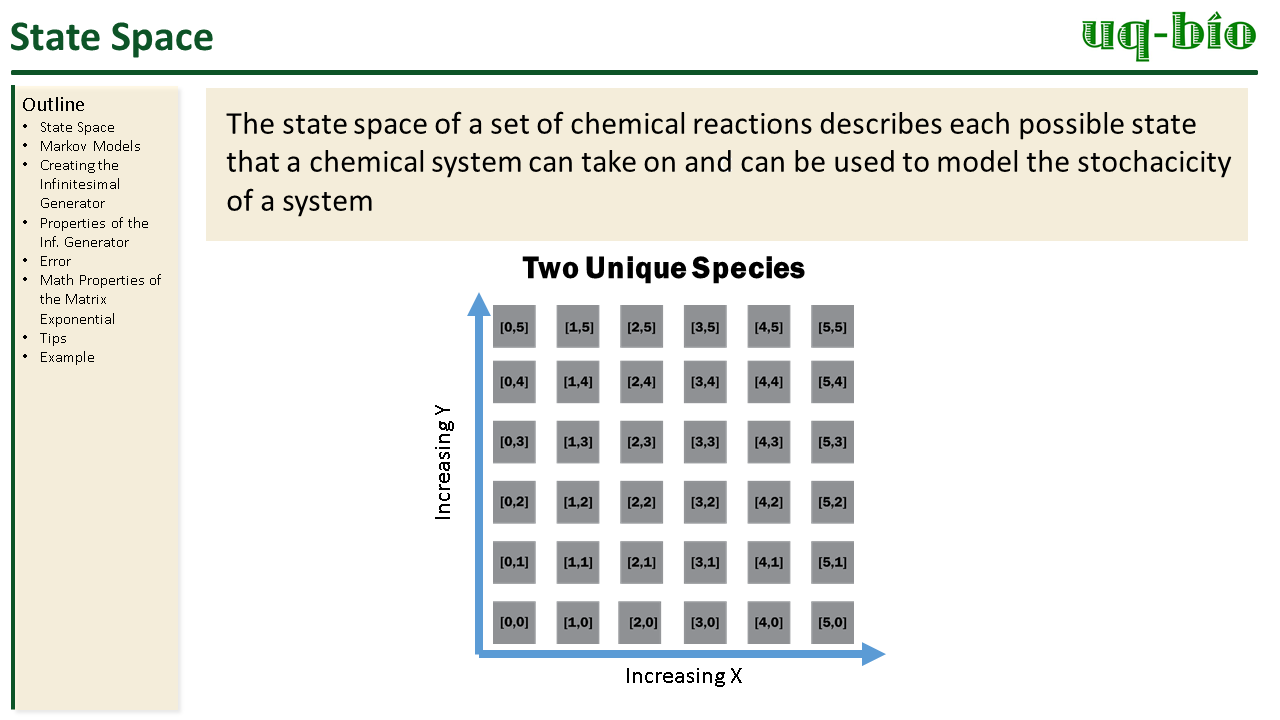

In [ ]:
#@title State Space
Image('/content/presentation/Slide5.PNG',width=figSize)

In [ ]:
#@title State Space
Image('/content/presentation/Slide5.PNG',width=figSize)


can calculate the probability of each state on the lattice (discrete because there is no 0.5 molecule or negative) 

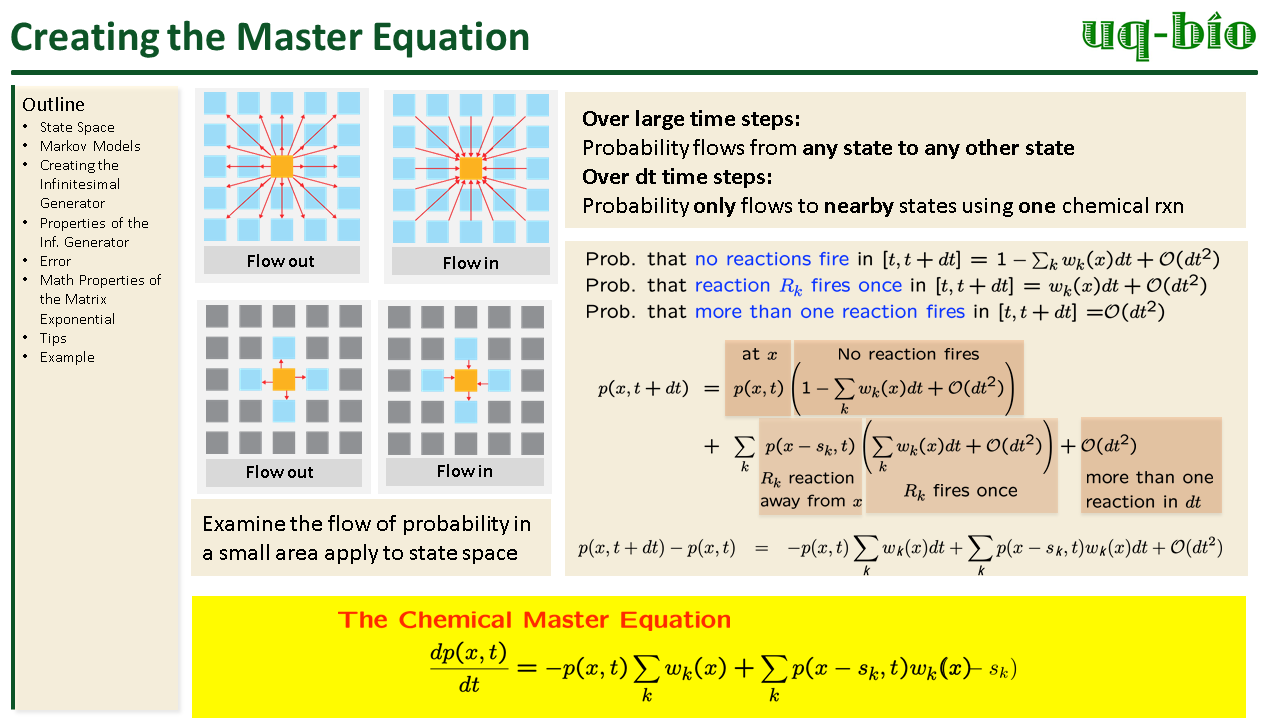

In [ ]:
#@title Creating the Master Equation
Image('/content/presentation/Slide9.PNG',width=figSize)

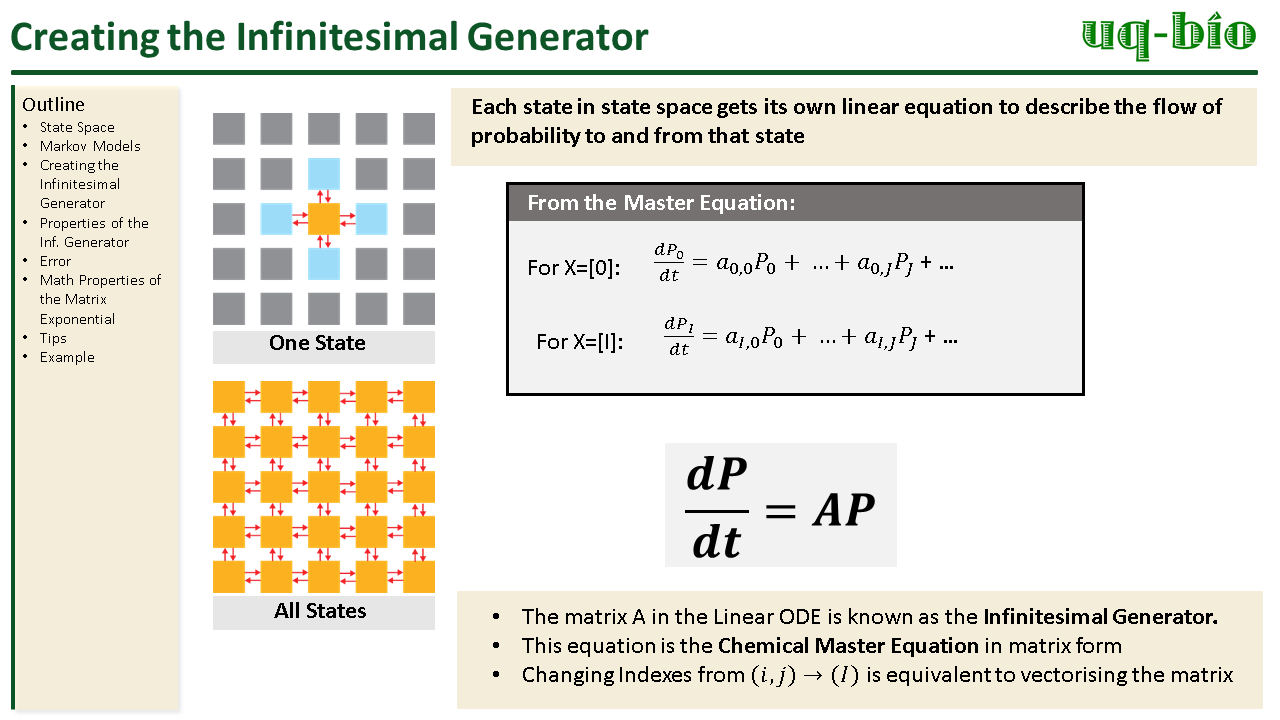

In [ ]:
#@title Creating A Linear System from the CME
Image('/content/presentation/Slide14.PNG',width=figSize)

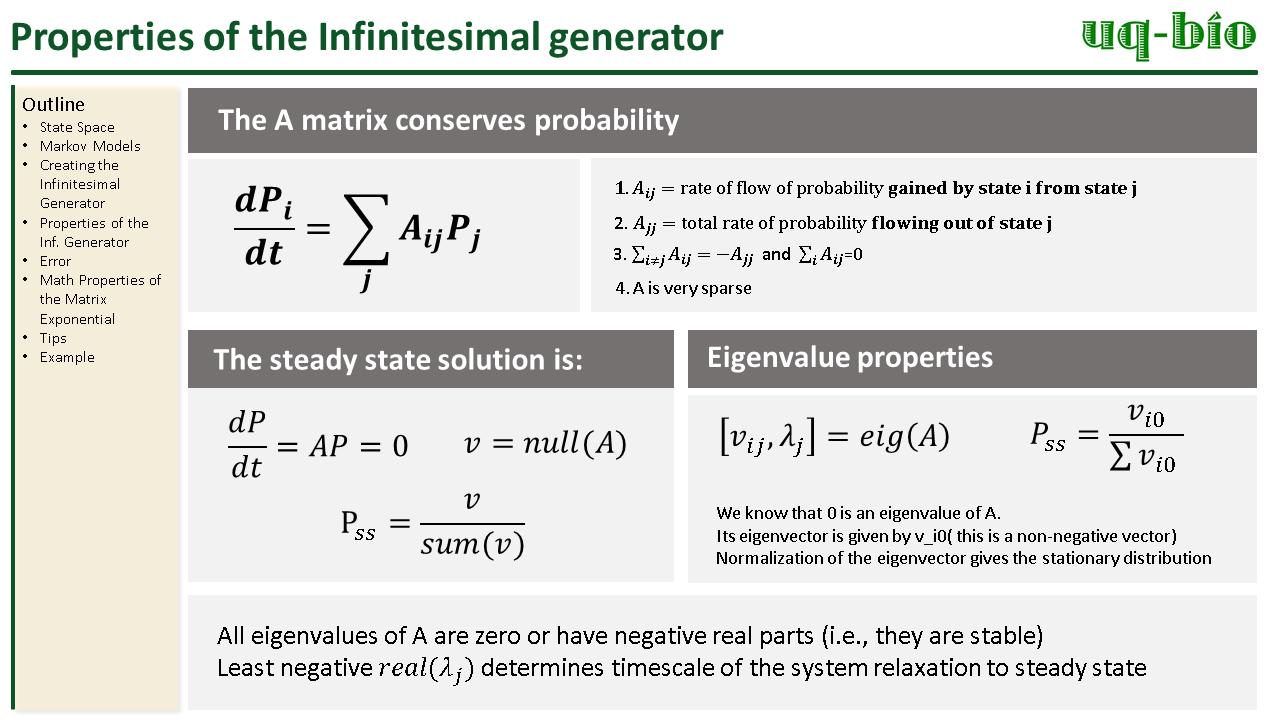

In [ ]:
#@title Math Properties of the Infinitesimal Generator
Image('/content/presentation/Slide15.PNG',width=figSize)

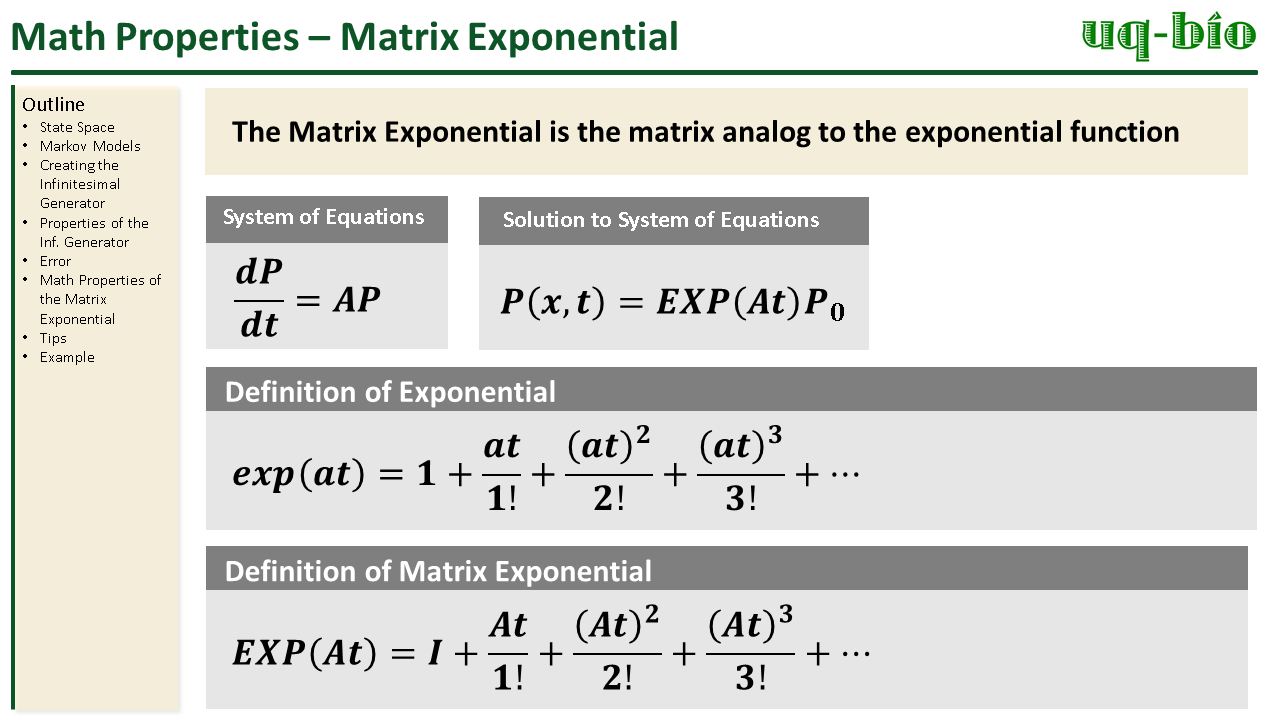

In [ ]:
#@title Solution to System of Equations
Image('/content/presentation/Slide19.PNG',width=figSize)

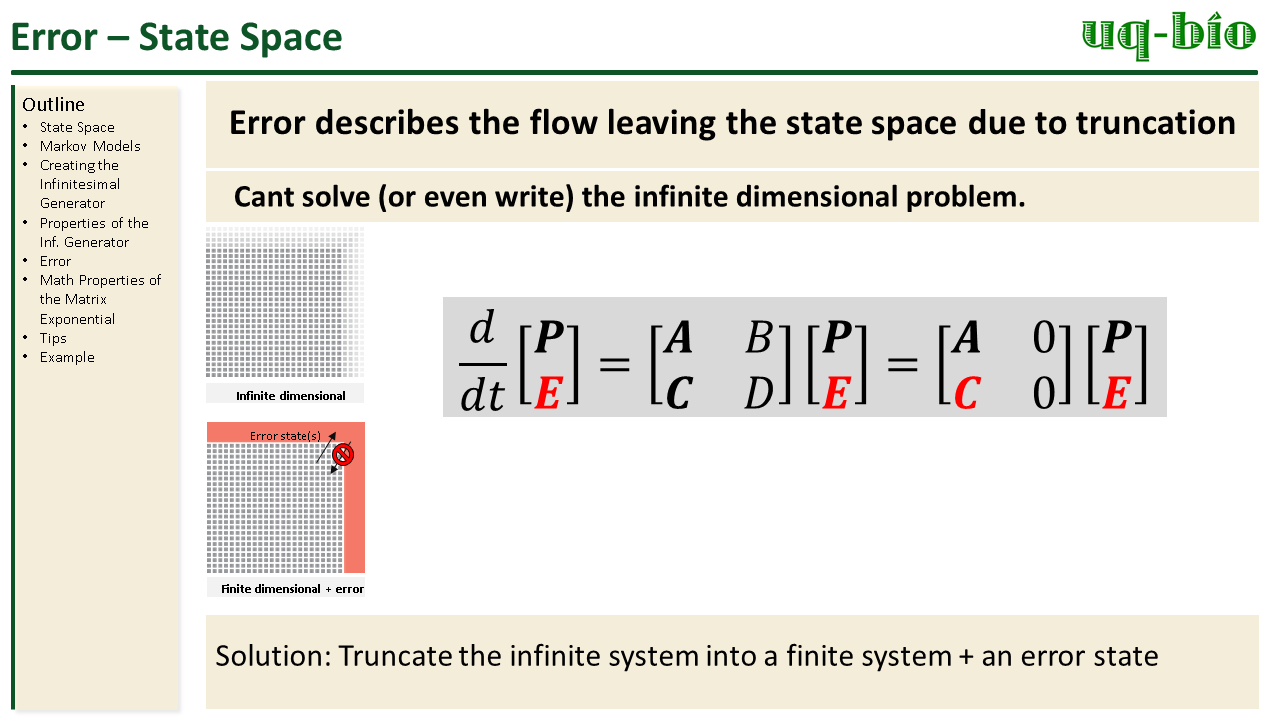

In [ ]:
#@title Error State
Image('/content/presentation/Slide17.PNG',width=figSize)

---
# **Problem 1: Birth-Decay**
A protein is modeled with birth propensity $k_1$ and degraded with propensity $k_2x_1$. Using the state space of 0 to 4 molecules and an error state of 5 or more molcules, calulate the FSP of the system
> 1. Use the Birth-Decay model with 5 states + error to fill out the A1 and A2 matricies below. Use only the birth equations for A1 and only decay equations for A2.
1. Use a `for` loop to create the A matrix for a large number of states.
1. Check that the column sum of A is a 0 vector.
1. Use the matrix exponential to solve for P(x,t) over a set of linearly spaced time points from 0 to 10 in 100 steps, and with the a delta distribution located at x=0 as the initial condition
1. Calculate the sum of P at each time point
1. Compare the FSP Solution to the SSA Solution

---

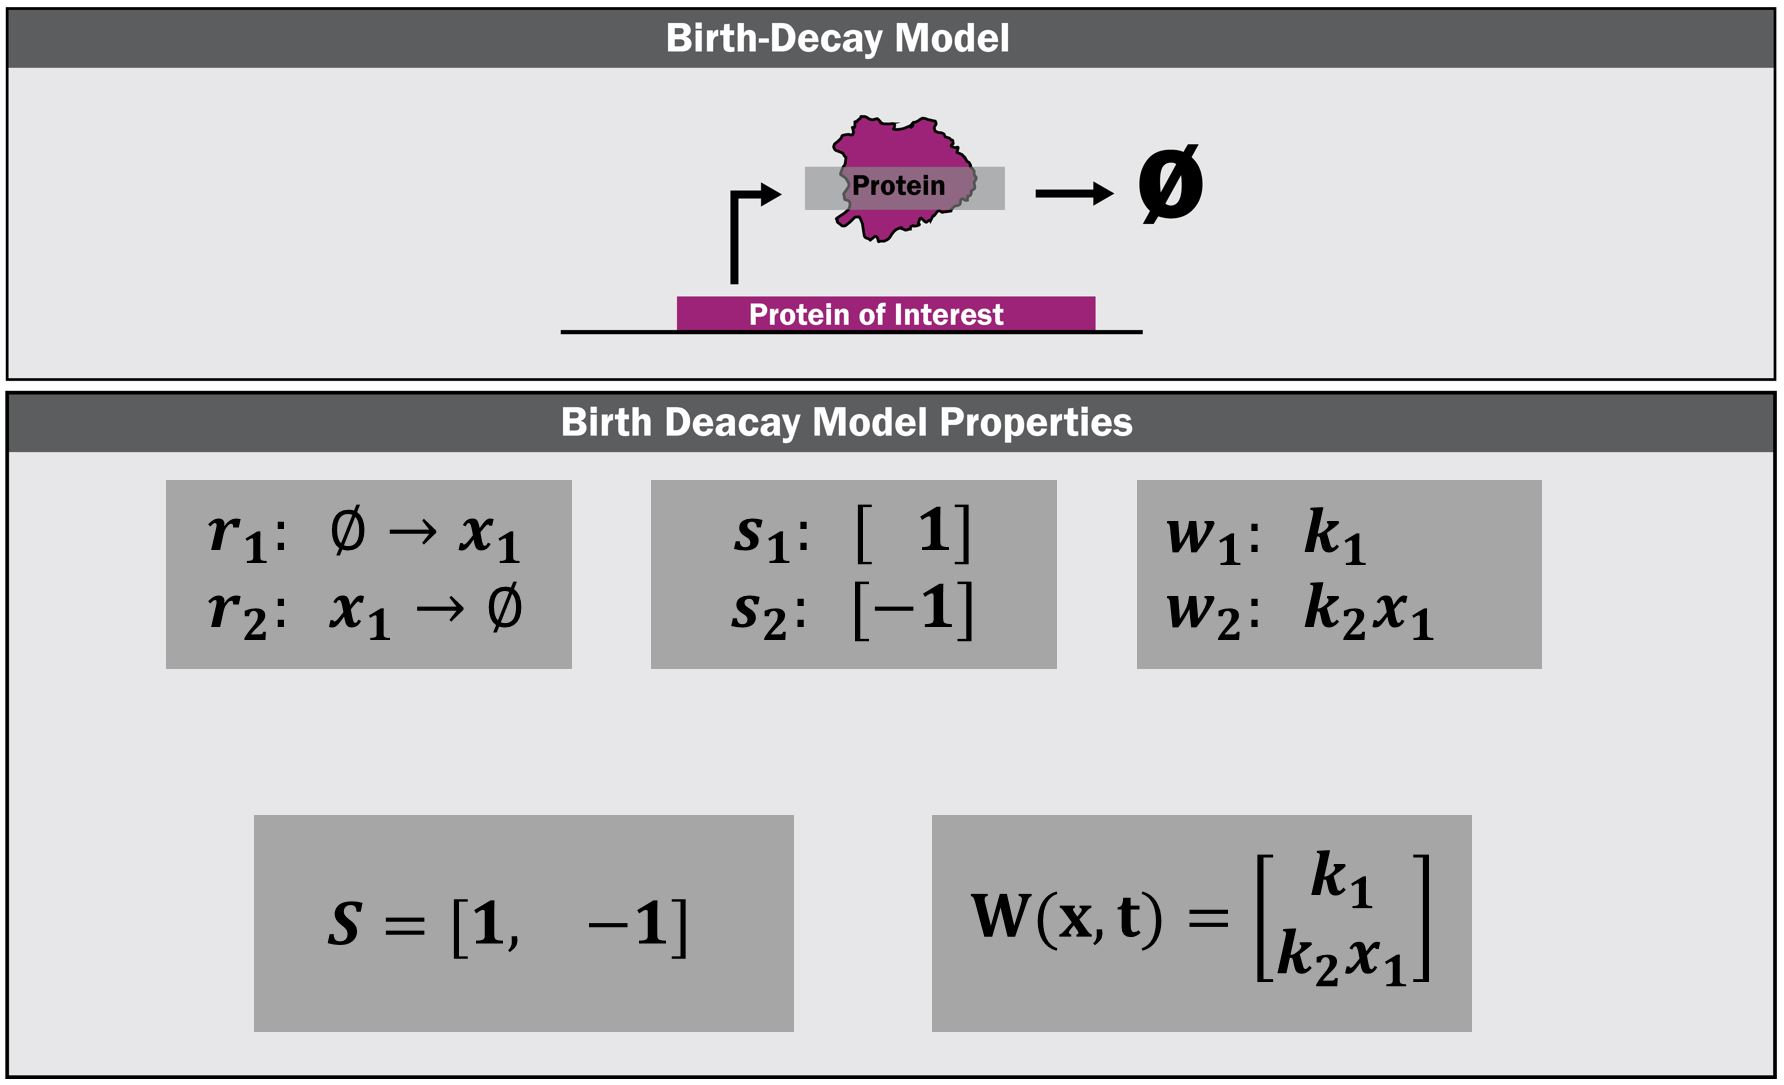

In [ ]:
#@title
Image('/content/figures/BirthDecay.JPG',width=figSize)

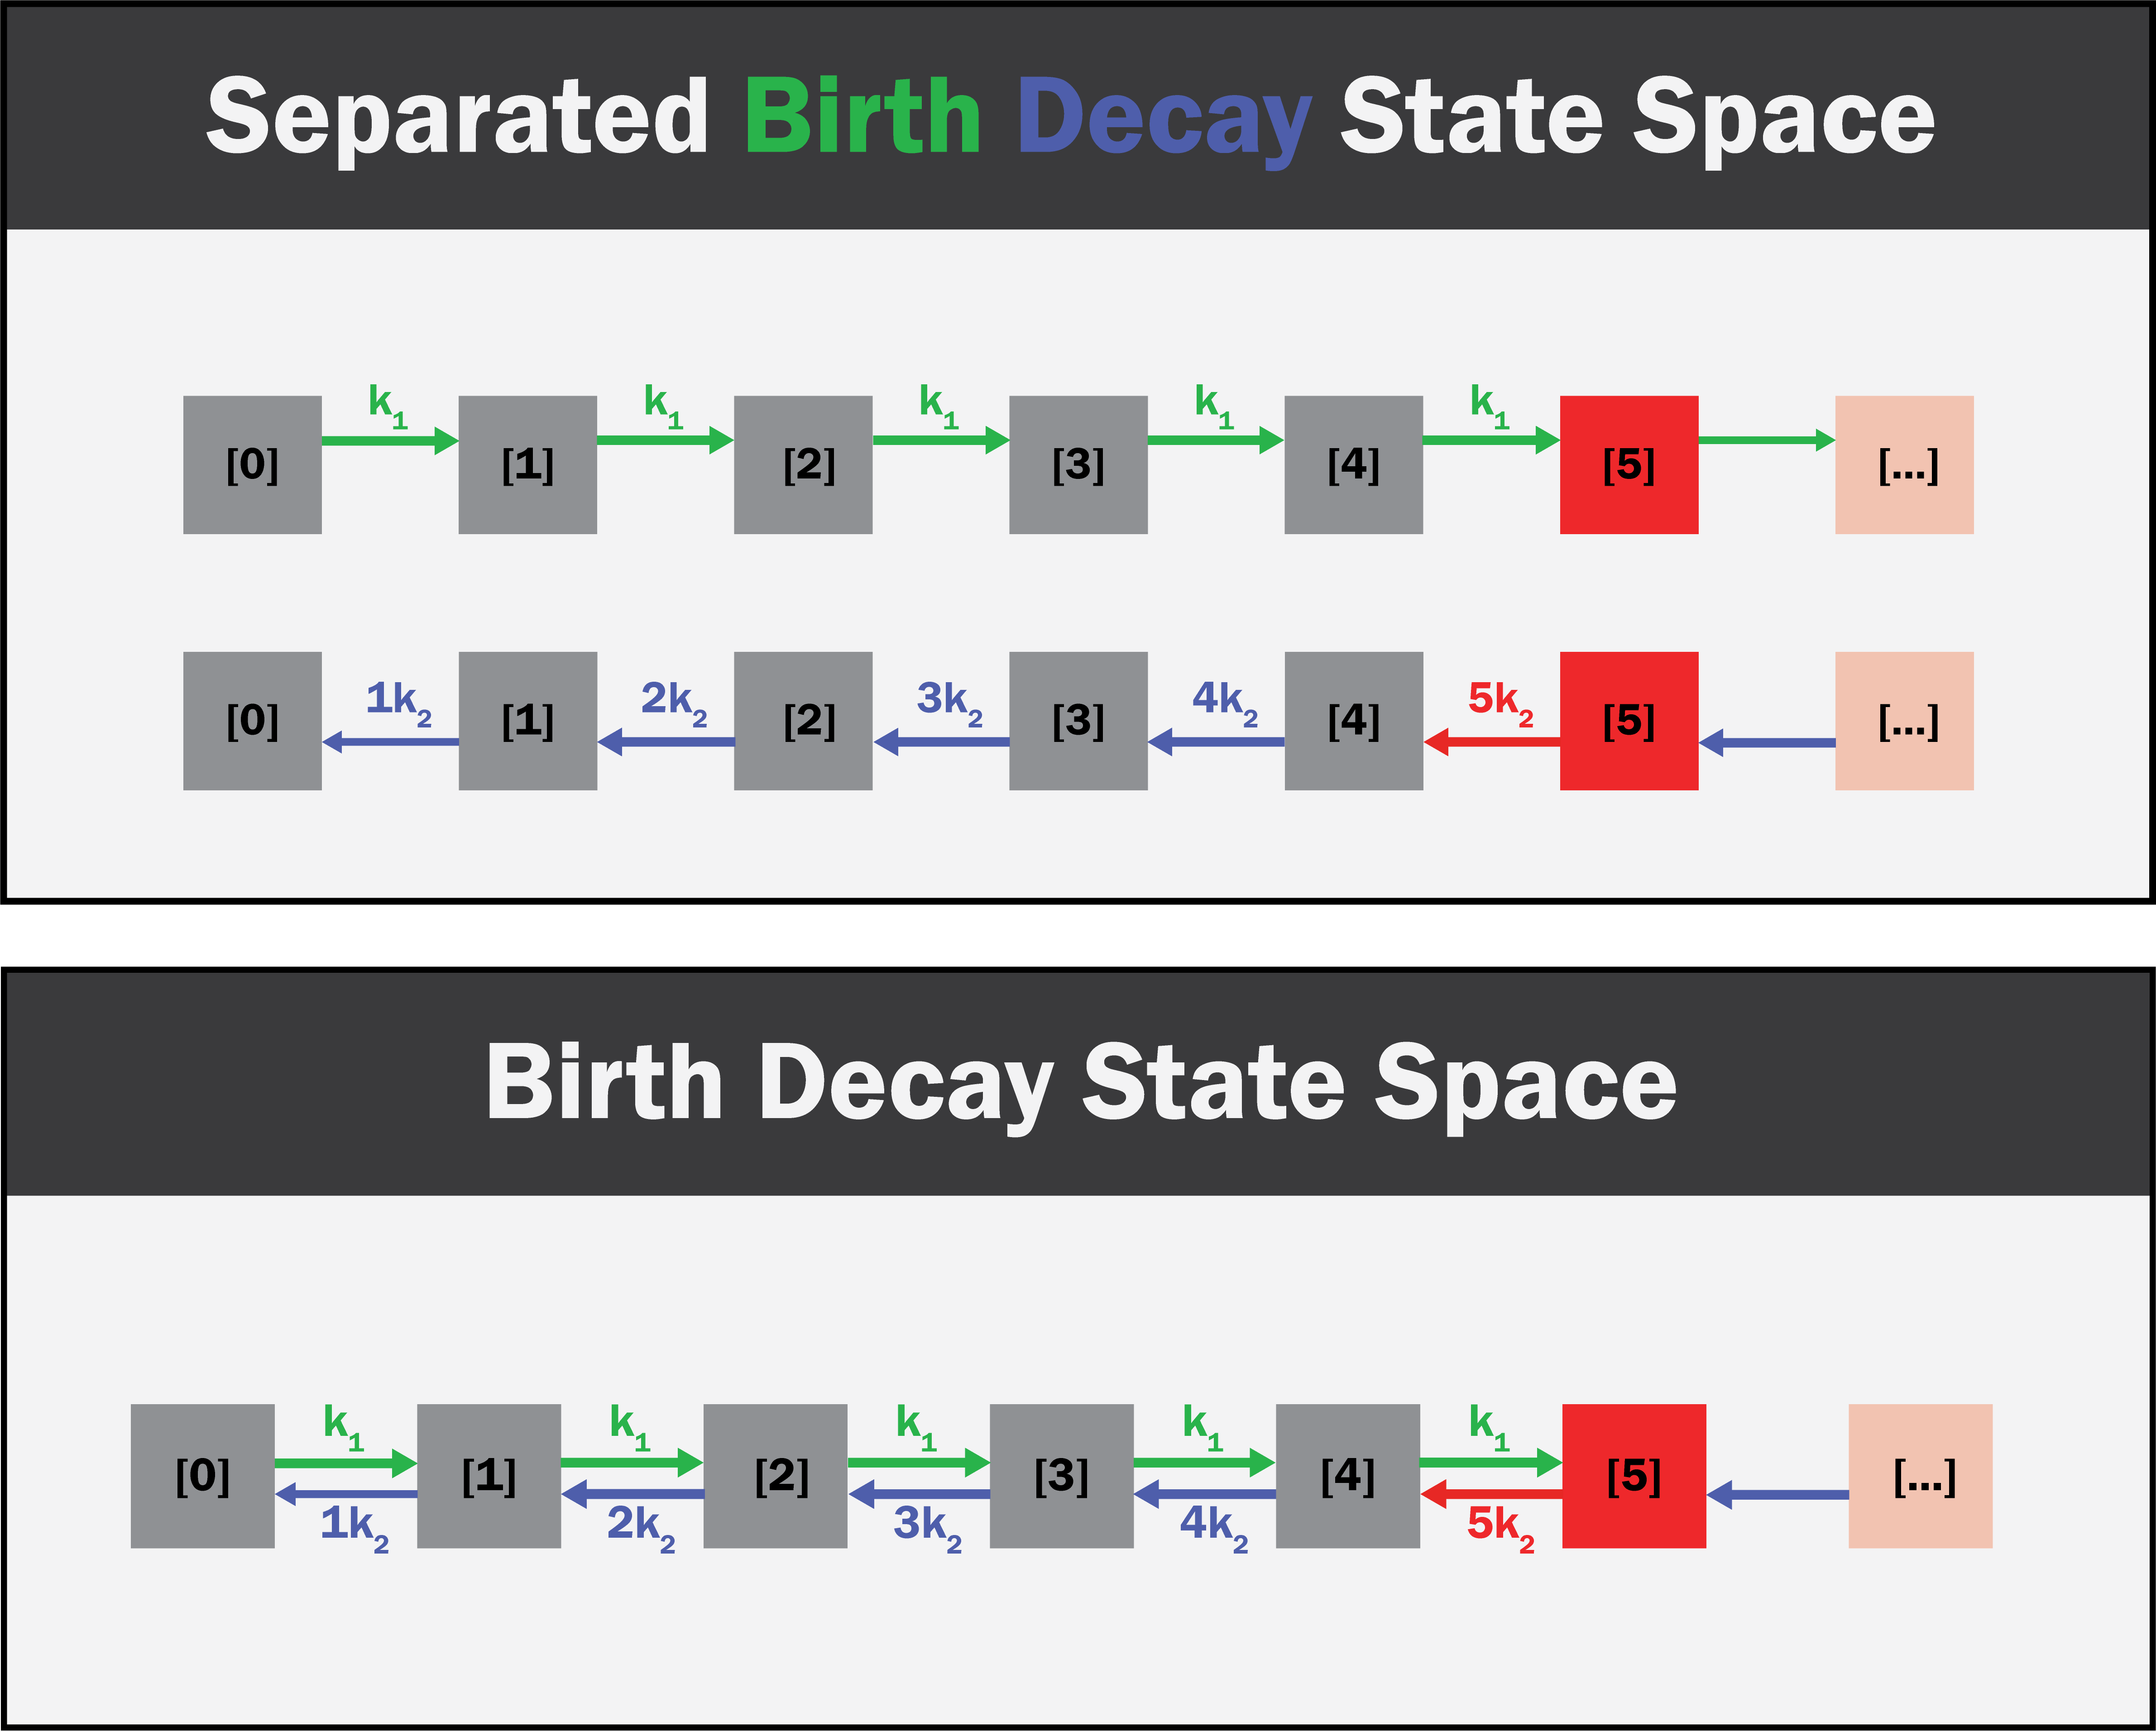

In [ ]:
#@title
Image('/content/figures/Birth-Decay.png',width=figSize)

**Part 1: Use the Birth-Decay model with 5 states + error to fill out the A1 and A2 Matricies below.**

$\frac{d}{dt}\begin{pmatrix}P\\E\end{pmatrix}=\begin{pmatrix}A&0\\C&0\end{pmatrix}P$

In [ ]:
# The location of each element in A tells you where the probability is from and 
# where it is going to

#          P0   P1   P2   P3   P4   E

#dP0/dt    A00  A01  A02  A03  A04  0
#dP1/dt    A10  A11  A12  A13  A14  0
#dP2/dt    A20  A21  A22  A23  A24  0
#dP3/dt    A30  A31  A32  A33  A34  0
#dP4/dt    A40  A41  A42  A43  A44  0
#dE/dt     CE0  CE1  CE2  CE3  CE4  0

k1=.1
k2=.05
A1=[[-k1,   0,     0,     0,    0,    0],
    [k1,   -k1,    0,     0,    0,    0],
    [0,     k1,   -k1,    0,    0,    0],
    [0,     0,     k1,   -k1,   0,    0],
    [0,     0,     0,     k1,  -k1,   0],
    [0,     0,     0,     0,    k1,  -k1]]

A2=[[0,    1*k2,    0,      0,     0,     0],
    [0,   -1*k2,   2*k2,    0,     0,     0],
    [0,     0,    -2*k2,   3*k2,   0,     0],
    [0,     0,      0,    -3*k2,  4*k2,   0],
    [0,     0,      0,      0,   -4*k2,   0],
    [0,     0,      0,      0,     0,     0]]
A=np.array(A1) + np.array(A2)

**Part 2. Use a for loop to create an infinitesimal generator of size N by N, with N an an arbirary sized integer**

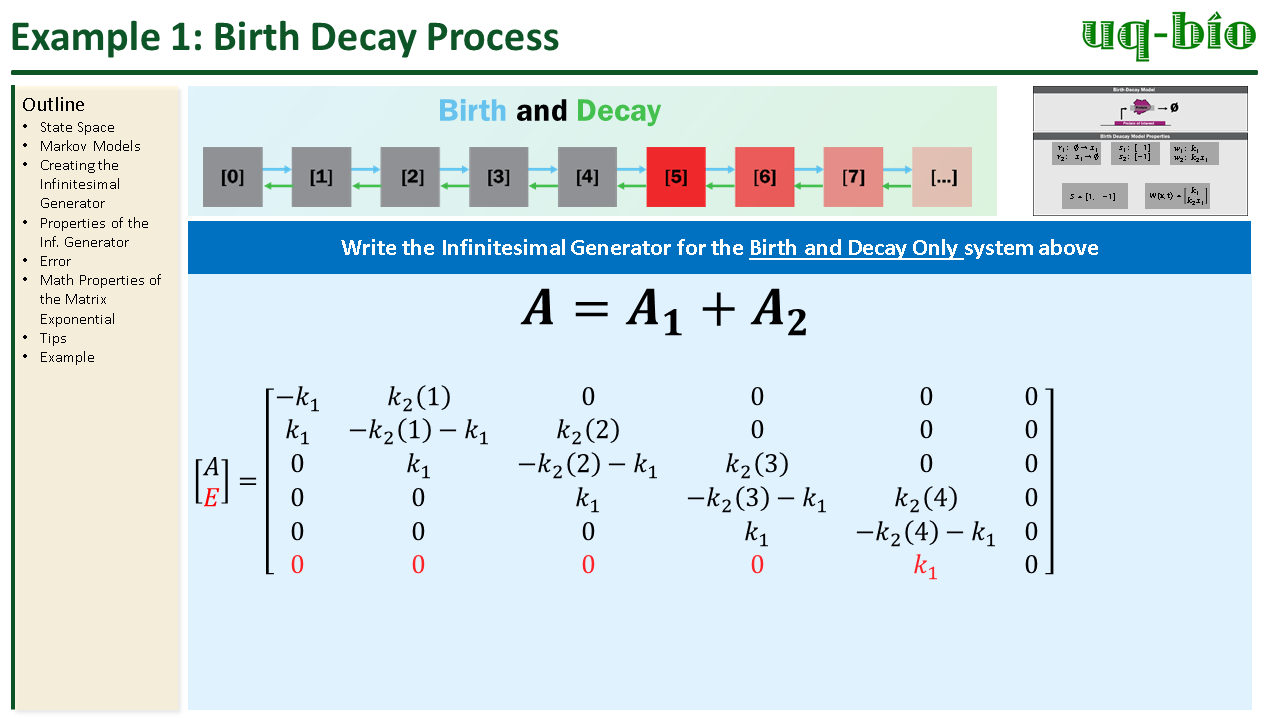

In [ ]:
#@title
Image('/content/presentation/Slide25.PNG',width=figSize)

In [ ]:
# Start be defing the relevant parameters
k1=1           # birth rate parameter
k2=.05         # death rate parameter 
N=60          # number of states in the state space+error, which also determines the size of the A matrix
# Preallocate the A matrix, which is always square
A=np.zeros([N,N])
# Step through each column of the matrix and add the proper terms taking into account both birth and decay
for i in range(N):
  if i<(N-1):
    A[i,i]=A[i,i]- k1                     # subtract the propensity of probability leaving due to creation from that state
    A[i+1,i]= k1                            # add the propensity of probability arriving to the next state
  if i>=1:
    A[i-1,i]= k2*i                            # subtract the propensity of probability leaving due to decay from that state
    A[i,i]=A[i,i]- k2*i                     # subtract the propensity of probability arring due to decay from the previous state
A[:,-1]=0
print(A)

[[-1.    0.05  0.   ...  0.    0.    0.  ]
 [ 1.   -1.05  0.1  ...  0.    0.    0.  ]
 [ 0.    1.   -1.1  ...  0.    0.    0.  ]
 ...
 [ 0.    0.    0.   ... -3.85  2.9   0.  ]
 [ 0.    0.    0.   ...  1.   -3.9   0.  ]
 [ 0.    0.    0.   ...  0.    1.    0.  ]]


---
**Part 3: Check that the columnsum is zero**

---

In [ ]:
# Perform the columnsum of A below


---
**Part 4. Use the matrix exponential to solve for P(x,t) over a set of linearly spaced time points from 0 to 10 in 100 steps, and with the a delta distribution located at x=0 as the initial condition**

The solution of P(x,t) is given by

$P(x,t)=EXPM(At)*P_0$

---

[]

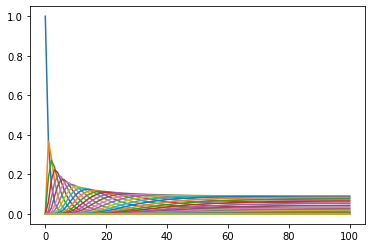

In [ ]:
# Define the initial probability distribution by preallocaitng a zero array and 
# adding a one where the SSA's start at, but you can pick any initialProbability 
# as long as initial Probability sums to one and each elemt is greater than 0.
initialProbability=np.zeros([N]).T
initialProbability[0]=1
# use a linearly spaced set of time points from 0 to 100 in 100 steps
time=np.linspace(0,100,100)
# preallocate a matrix to save the history of each state
probabilityHistory=np.zeros([len(initialProbability),len(time)])
for i in range(len(time)):
  currentState=scipy.linalg.expm(A*time[i]) @ initialProbability
  probabilityHistory[:,i]=currentState
plt.plot(time,probabilityHistory[:-1,:].T)
[]

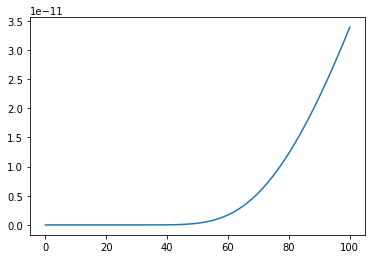

In [ ]:
# Make plots of the probability in the error state over time
plt.plot(time,probabilityHistory[-1,:].T)

**Part 5. Calculate the sum of P at each time point**

In [ ]:
# Calulate the sum of P at every point.
# hint: Dont include error
np.sum(probabilityHistory[:-1,:], axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

**Part 6. Compare the FSP Solution to the SSA solution using solveSSA, and solveFSP**

Text(0, 0.5, 'Protein Count')

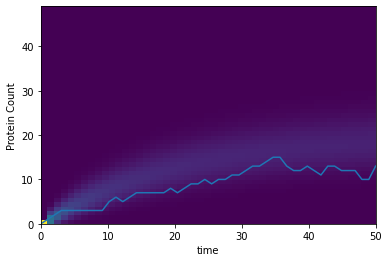

In [ ]:
# Define the Parameters
# the time vector is linearly spaced numbers between 0 and 50 and define the points in time for the solver to print
time = np.linspace(0, 50)    
# the initial state of the SSA and FSP has all trajectories starting at 0                                       
state = np.array([0]).T      
# the stoichiometry Matrix for the creation of protein [+1], and the degredation of protein [-1]                                       
stoichiometry = np.array([[1, -1]])       
# the propensity is a lambda function of time, state and parameters and always returns a vector of propensity                                 
propensity = lambda t, x, k: np.array([k[0], k[1] * x[0]]).T  # w1=k0 and w2=k1x0. The first propensity is creation and the second propensity is decay
# parameters defines k[0] and k[1]                                
parameters=np.array([1,.05])                                       

# Solve for the SSA using the function
(ssaTime,ssaState)=solveSSA(time,state,stoichiometry,propensity,parameters)

# Solve for the FSP using the function
(fspTime,fspState)=solveFSP(time,state,stoichiometry,propensity,parameters,[50])

#use matlplotlib to overlay the SSA solution over the FSP solution
plt.pcolor(fspTime,range(50),fspState[:,:50].T)
plt.plot(ssaTime,ssaState)
plt.xlabel('time')
plt.ylabel('Protein Count')

---

# **Problem 2: Extinction Explosion**


A population of rabits inhabit an island whose popluation over time folows a stochastic trajectory(SSA). If the population of rabits ever hits zero or one by random chance, no rabits can ever be made again and the population is destined to be zero forerver. Conversely, when the number of rabits becomes large, the rate of birth exceedes the rate of death and the population is destined to explode to infinte rabbits. There are two desitines for the stochastic rabbit poulation explosion or extinction. 

> 1.  Create the Extinction Explosion infinitesimal generator for an arbitrary number of states using the figure below. Let kappa=0.05/19, and gamma = 0.05 using the figure below.
1.  Solve for the time dynamics of the system using the matrix Exponential.
1.  Solve for the 0 nullspace of the model. Do you notice anyting strange?

---

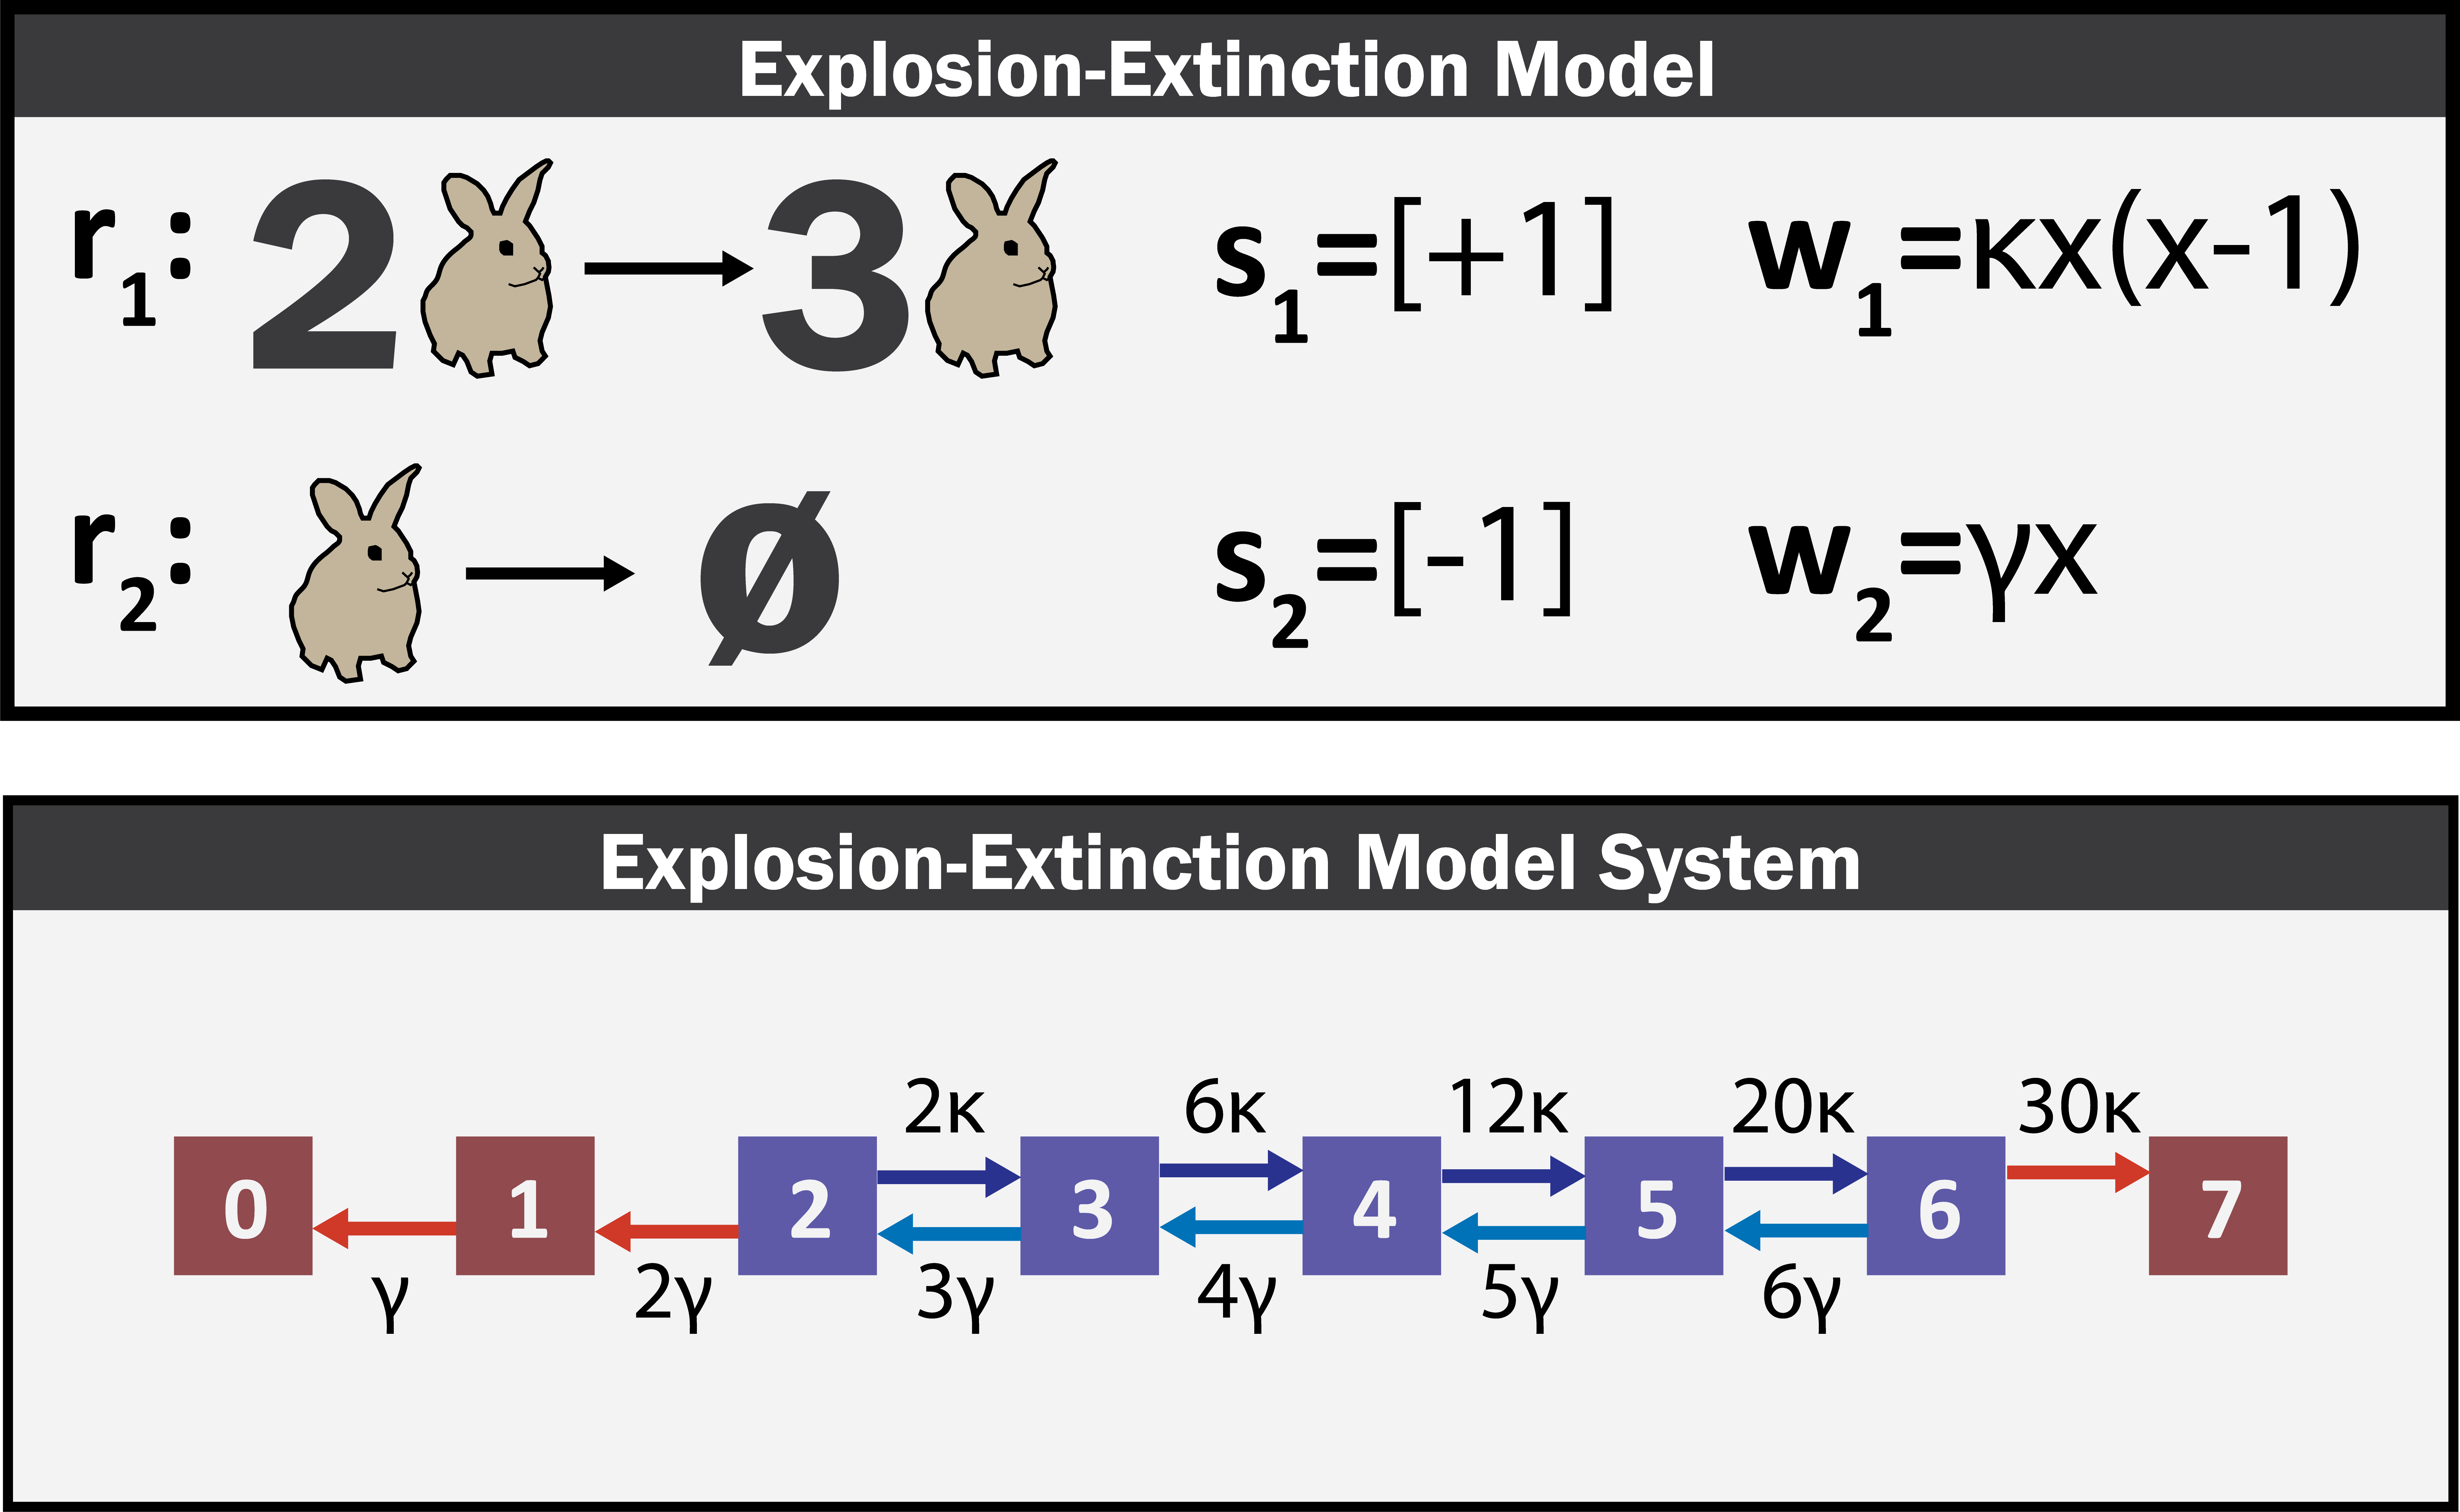

In [ ]:
#@title
Image('/content/figures/ExtinctionExplosion.png',width=figSize)

[]

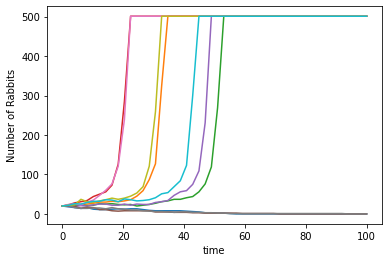

In [ ]:
# This function makes 10 SSA Simulations of the extinction-explosion Model with 
# k=.05/19 and g=.05
makeExplosionExtinctionSSAPlot()
plt.ylabel('Number of Rabbits')
plt.xlabel('time')
[]

**Part 1. Create the Extinction Explosion Model Infintesimal Generator for an arbitrary number of states.**



In [ ]:
# define the k and g parameters in the model
k=0.05/19
g=0.05

# define the numer of states used in the FSP
numStates=100 
# Preallocate the A Matrix
A=np.zeros([numStates,numStates])
for i in range(numStates):
  if i<(numStates-1):          # Do not add a propensity to create at the lest step
    A[i+1,i]= k*i*(i-1)                 # add the propensity to create a molecule to the next state
    A[i,i]=A[i,i] -k*i*(i-1)             # subtract the ammount of probability lost in the current state
  if i>=1 and i<(numStates-1): # Do not add propensity to decay when X=0 or X=N
    A[i-1,i]=g*i                # add the propensity to decay to the previous state
    A[i,i]=A[i,i] -g*i             # add the propensity to decay to the previous state

**Part 2. Solve for the time dynamics of the system using EXP.**



Text(0, 0.5, 'Probability')

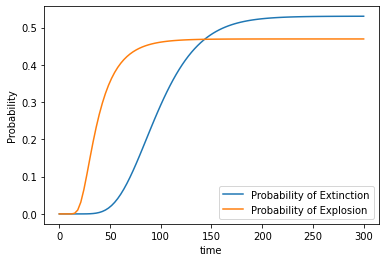

In [ ]:
# Define the set of timepoints used as linearly spaced numbers from 0 to 300 using 100 time points
time=np.linspace(0,300,100)   
# Define the initial probability of the system. We want all the probability centered on a single location. 
# This is equivalent of running many SSA's starting at that state.           
initialProbability=np.zeros([numStates]).T
initialProbability[20]=1
# preallicate the matrix that stores the hisory of the probability distribution
probabilityHistory=np.zeros([numStates,len(time)])
for i in range(len(time)):
  currentState=scipy.linalg.expm(A*time[i]) @ initialProbability      # Analyze P(x,t)=Expm(At)Po
  probabilityHistory[:,i]=currentState                                # write the solution at t(i) into the state history  
# Plot both the sink states below              
plt.plot(time,probabilityHistory[0,:])
plt.plot(time,probabilityHistory[-1,:])
plt.legend(['Probability of Extinction','Probability of Explosion'])
plt.xlabel('time')
plt.ylabel('Probability')

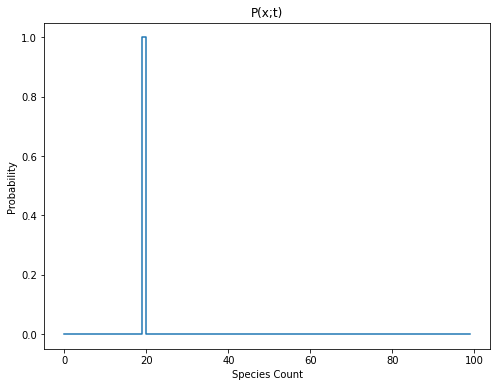

In [ ]:
#@title
fig=plt.figure(figsize=(8,6))
ax = plt.axes()
def frame(w):
    ax.clear()
    global time,state,numStates
    plt.title("P(x;t)")
    ax.set_xlabel('Species Count')
    ax.set_ylabel('Probability')
    plot=ax.step(range(numStates),probabilityHistory[:,w])
    return plot
anim = animation.FuncAnimation(fig, frame, frames=len(time), blit=False, repeat=True)
anim

**Part 3. Use this area to calculate the nullspace of A**

In [ ]:
# Calculate the nullspace of A here


---
# **Problem 3: Gene Bursting**
The Gene bursting model can be rewritten into a two state model where the first state is the nuber of active gene and the second state is the number of protein. Use the altered two state model to solve for the questions below.
> 1. Create a model by defining time, stoichimetry, propensity and initial state, and parameters, and solve for the model using solveFSP(time,initialState,stoichiometry, propensity, parameters,sink=True, isTimeVarying=False). Use the sliders below to see how time, parameters and state space size changes the Error.
1. Use makeInfGenerator() to create an inf Generator of the bursing gene model, and use the function to calulate the steady state and the relaxation time of the system. Change the sink property of the function and resolve for the steadystate solution.
1. Use the solution at the final time point to solve for the probability of Gene on, the probability of the Gene off, and the total ammount of protein in the system. 

---

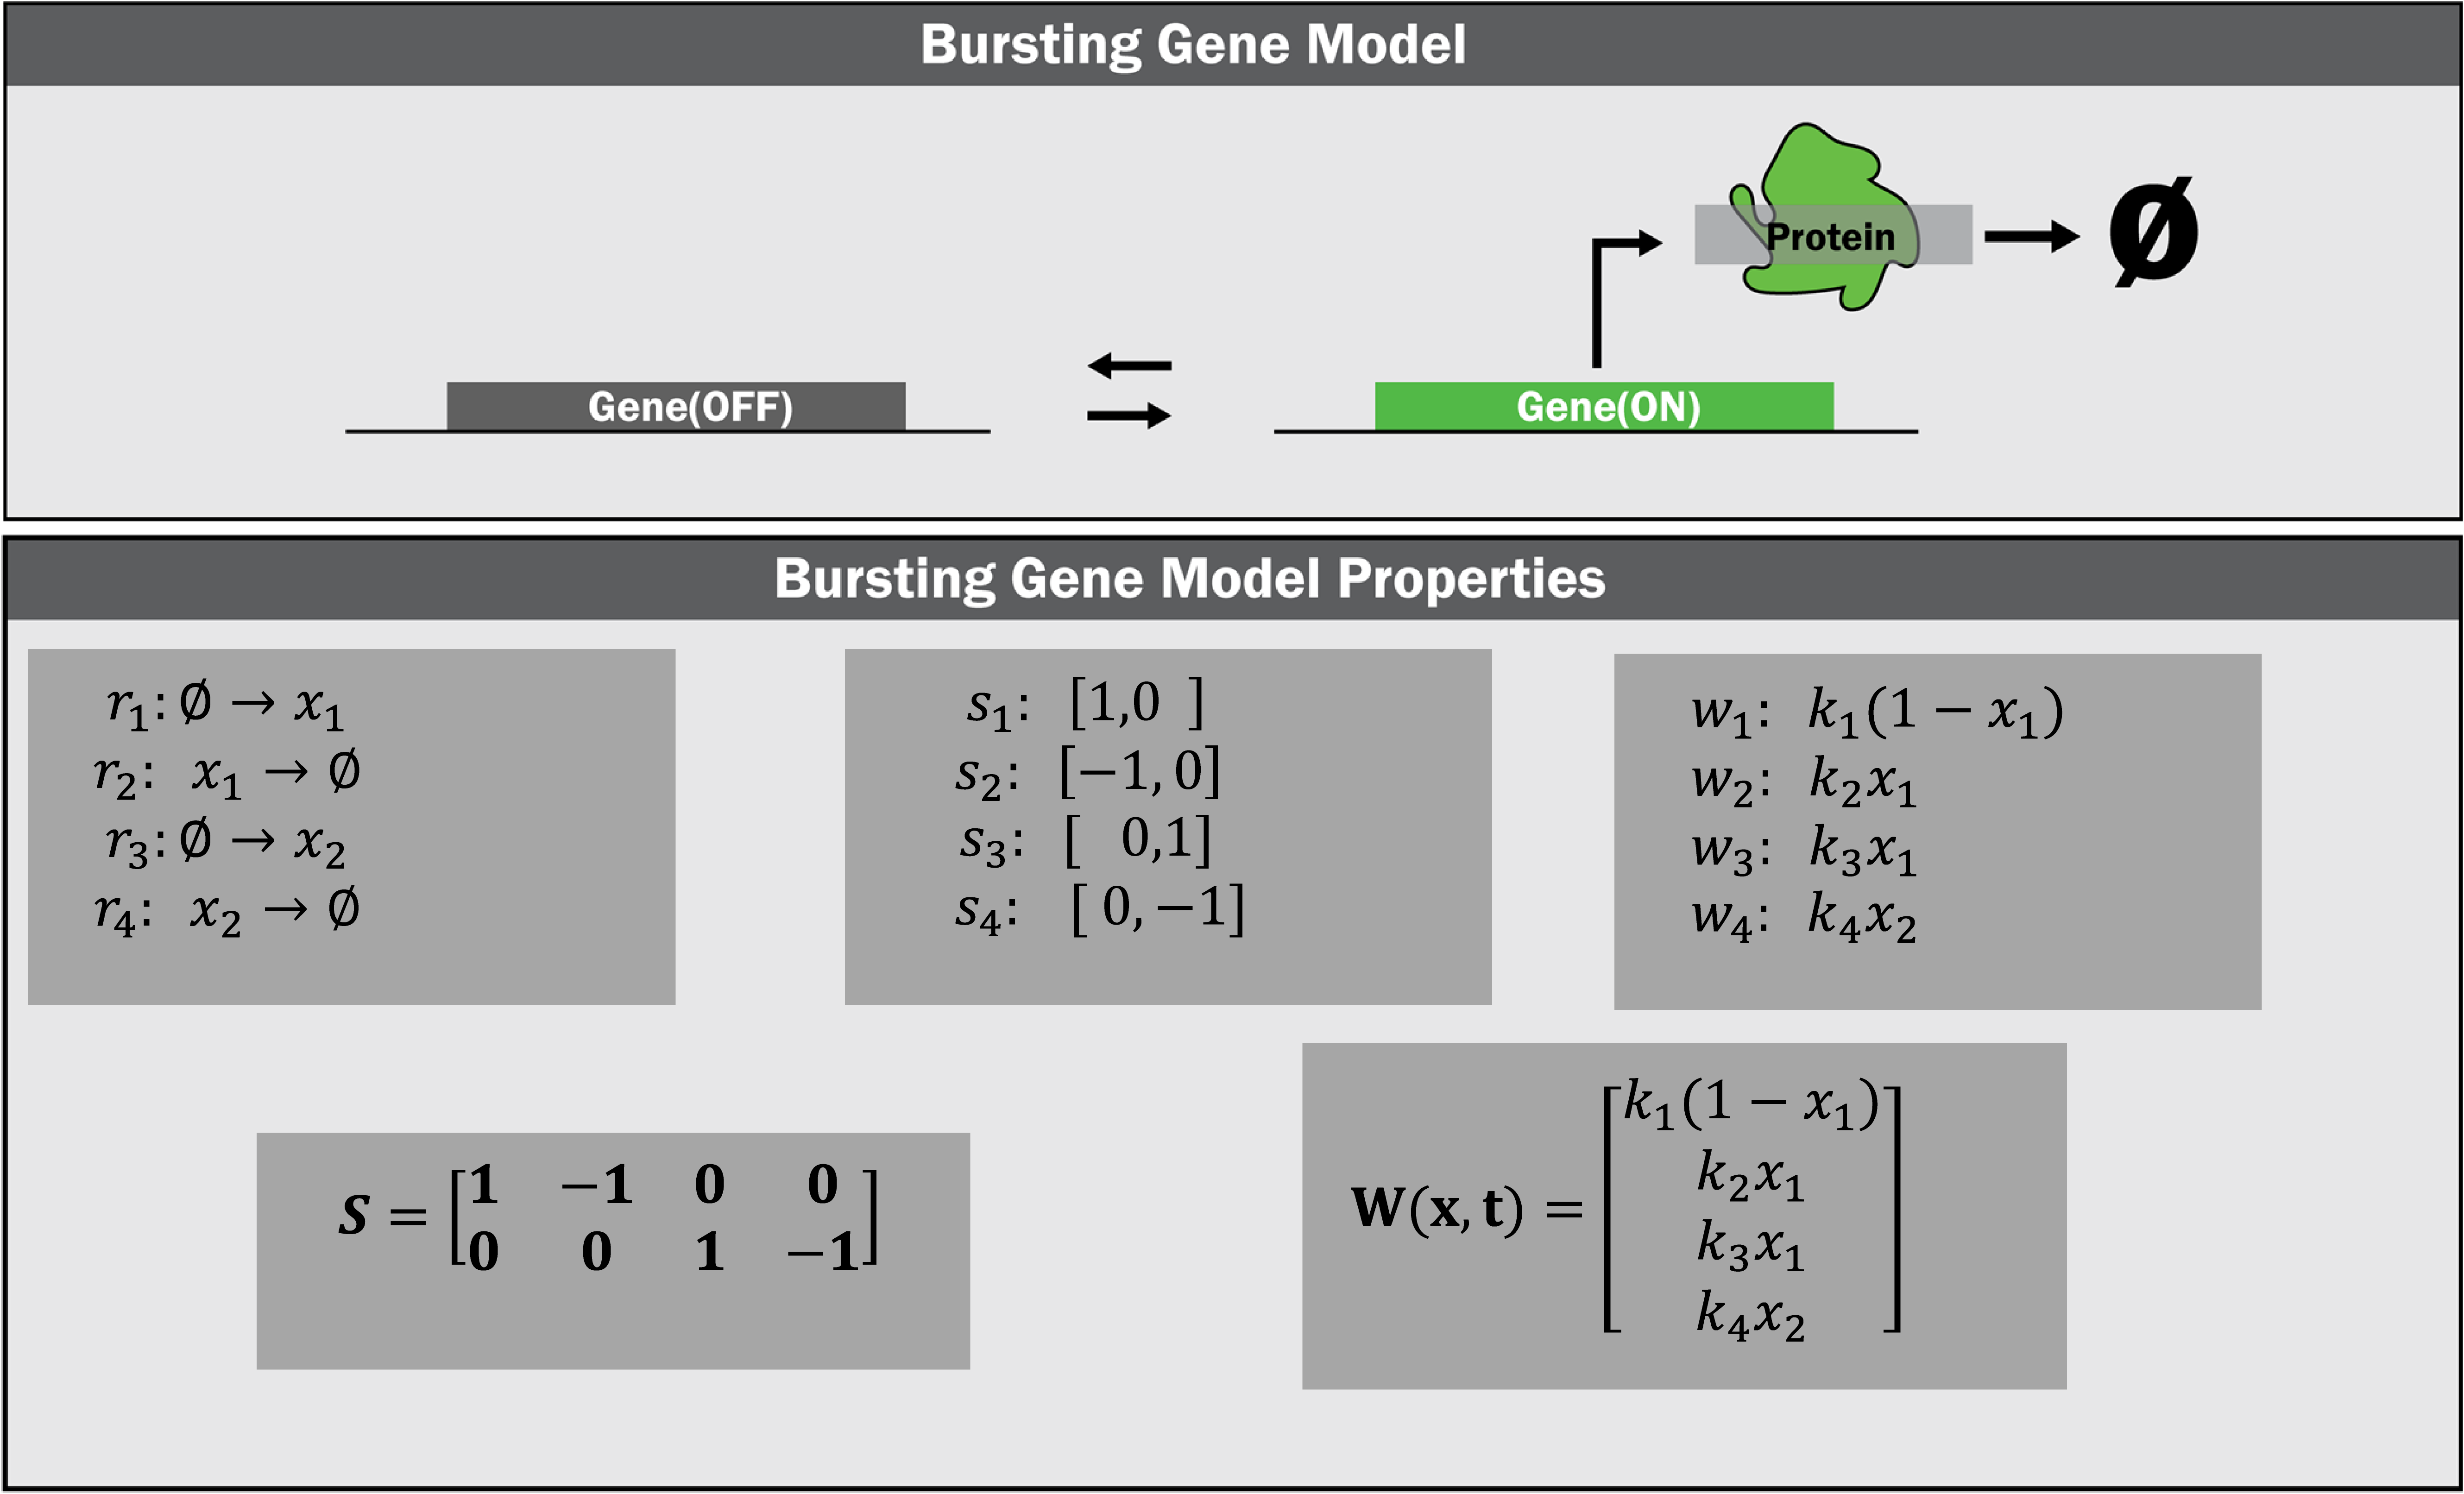

In [ ]:
#@title
Image('/content/figures/Bursting.png',width=figSize)

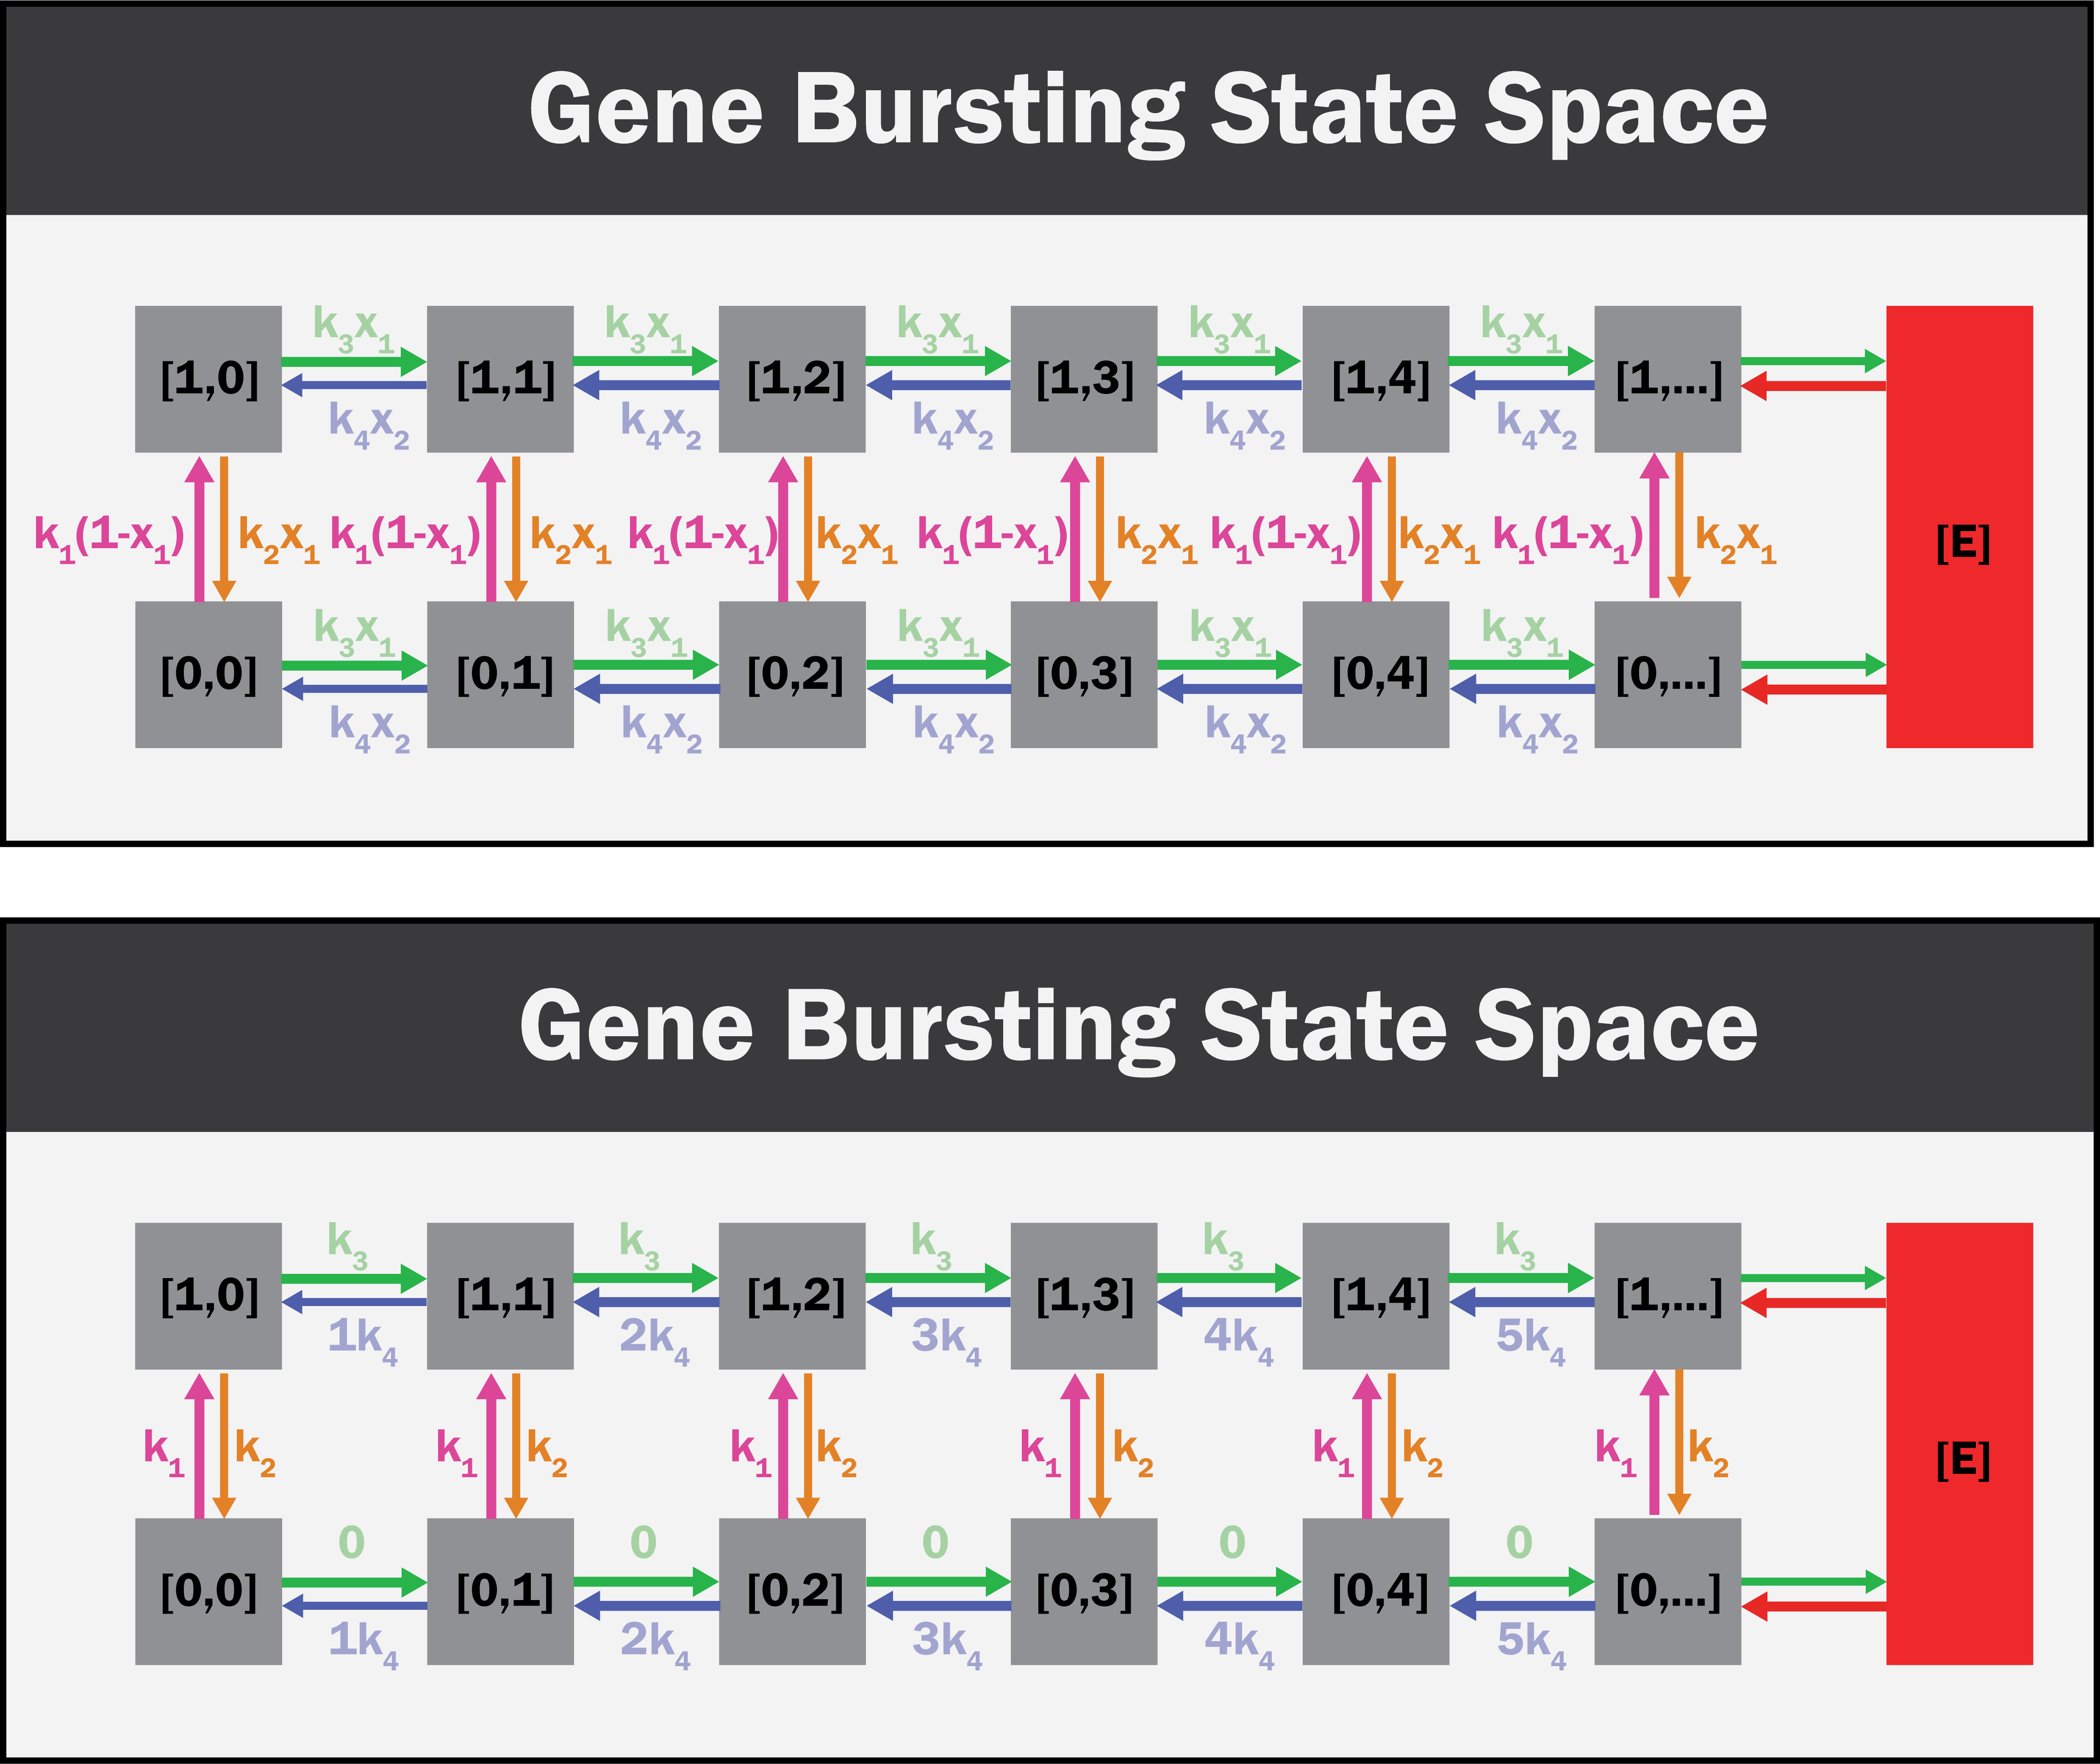

In [ ]:
#@title
Image('/content/figures/GeneBurstingStateSpace.png',width=figSize)

---

**Part 1. Create a model by defining time, stoichimetry, propensity and initial state, and parameters, and solve for the model using solveFSP(time,initialState,stoichiometry, propensity, parameters,sink=True, isTimeVarying=False)**

---

In [ ]:
#@title Raw fields
numStates=150#@param {type:"raw"}
finalTime=100#@param {type:"raw"}
############
time = np.linspace(0, finalTime,100)
initialState = np.zeros([2*numStates]).T
initialState[0]=1
propensity = lambda t, x, k: np.array([k[0]*(1-x[0]),      # Gene OFF to Gene ON 
                                       k[1]*x[0],          # Gene ON to Gene OFF 
                                       k[2]*x[0],          # Gene ON and Makes Protrin
                                       k[3]*x[1]]).T       # Protein Decay
stoichiometry = np.array([[ 1, -1,  0,  0],
                          [ 0,  0,  1, -1]])   
parameters = np.array([0.05, 0.015, 5.0, 0.05])
(time,state)=solveFSP(time,initialState,stoichiometry,propensity,parameters,[2,numStates],sink=True,isTimeVarying=False)
error=state[:,-1]
print("Error: %s" % (error[-1] ))

Error: 4.756176733041108e-06


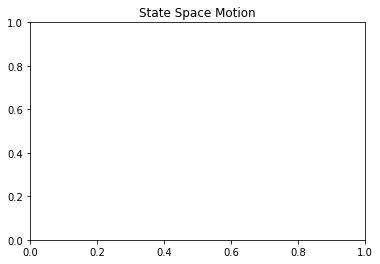

In [ ]:
#@title
fig=plt.figure(figsize=(8,6))
ax = plt.axes()
def frame(w):
    ax.clear()
    global time,state,numStates
    plt.title("State Space Motion")
    ax.set_xlabel('X(t)')
    ax.set_xlim(-1,numStates)
    ax.set_ylabel('Y(t)')
    xRange=range(len(state[w,:numStates:]))
    plot=ax.step(xRange,state[w,0:numStates:],'r-')
    plot=ax.step(xRange,state[w,(numStates):-1:],'b-')
    plot=ax.step(xRange,state[w,(numStates):-1:]+state[w,:numStates:],'g-')
    ax.legend(['Protein | Gene Off','Protein | Gene On','Protein'])
    return plot
anim = animation.FuncAnimation(fig, frame, frames=100, blit=False, repeat=True)
plt.close(fig)
anim

---
**Part 2.  Use makeInfGenerator(stoichiometry,propensity,parameters,dimensions) to create an inf Generator of the bursing gene model, and use the function to calulate the steady state and the relaxation time of the system. Change the sink property of the function and resolve for the steadystate solution.**

 ---

[[ -0.05    0.05    0.    ...   0.      0.      0.   ]
 [  0.     -0.1     0.1   ...   0.      0.      0.   ]
 [  0.      0.     -0.15  ...   0.      0.      0.   ]
 ...
 [  0.      0.      0.    ... -12.365   7.4     0.   ]
 [  0.      0.      0.    ...   5.    -12.415   7.45 ]
 [  0.      0.      0.    ...   0.      5.     -7.465]]


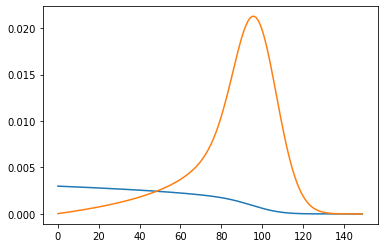

In [ ]:
infGenerator=makeInfGenerator(stoichiometry,propensity,parameters,[2,numStates],sink=False)
# Use the space below to calulate the eigenvalues and eigenvectors of A, 
# and the steady state distibution of dP/dt=AP
print(infGenerator)
[l,v] = np.linalg.eig(infGenerator)
np.max(l)
maxIndex = np.argmax(l)
Pss = np.real(v[:,maxIndex]) / np.sum(np.real(v[:,maxIndex]))
plt.plot(Pss[0:numStates])
plt.plot(Pss[numStates:])

**Use the steady state solution to solve for the probability of Gene on, the probability of the Gene off, and the total ammount of protein in the system.**

In [1]:
Pss=np.reshape(Pss,[2,numStates])
# Use the Reshapped Pss to calculate information about the probability of total 
# protein and the probability of Gene On and Gene Off

NameError: ignored